# Probabilistic Quantum Clustering

This technique aims to benefit from the quantum formalism when generating a membership function for a given data point given the concentration of surrounding neighbors.

In [1]:
from sklearn import datasets

# import some data to play with
X,y = datasets.load_iris(return_X_y=True, as_frame=True)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


We will simplify this example by just letting it detect two well defined regions (we will see it already brings some complexity).

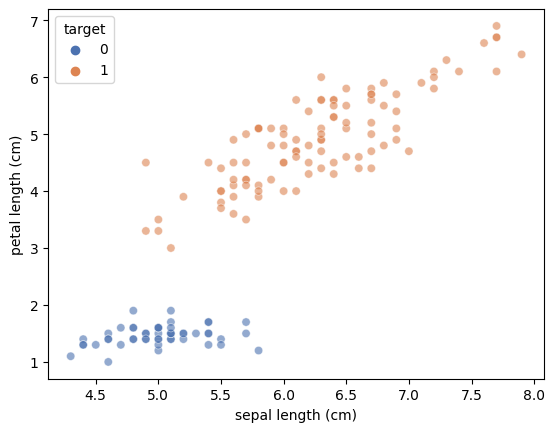

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

target = (y > 0).astype(int)
sns.scatterplot(x=X["sepal length (cm)"], y=X["petal length (cm)"], alpha=0.6, hue=target, palette="deep")
plt.show()

We will load a regular Falcondale project as this is our entrypoint taken care of all the work needed to preprocess and ease following steps.

In [ ]:
from falcondale import Project

dataset = X[["sepal length (cm)","petal length (cm)"]].copy()
dataset["target"] = target

myproject = Project(dataset, target="target")

In [4]:
myproject.preprocess()
fs = myproject.show_features()

In this case we have selected two features that should be easy enough to select from our two labels. This can also be handled by reducing dimensionality or by simply adding the $n$-dimensional dataset.

In [5]:
fs

,sepal length (cm),petal length (cm)
0,0.222222,0.067797
1,0.166667,0.067797
2,0.111111,0.050847
3,0.083333,0.084746
4,0.194444,0.067797
...,...,...
145,0.666667,0.711864
146,0.555556,0.677966
147,0.611111,0.711864
148,0.527778,0.745763


We can test some classical techniques as well, in order to compare with respect to the quantum inspired methods.

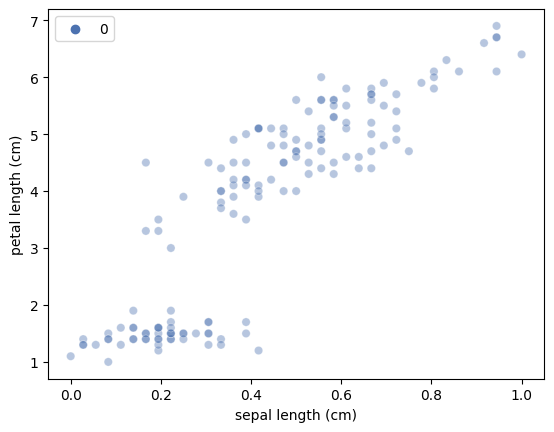

In [6]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=1, min_samples=2).fit(fs)

sns.scatterplot(x=fs["sepal length (cm)"], y=X["petal length (cm)"], alpha=0.4, hue=clustering.labels_, palette="deep")
plt.show()

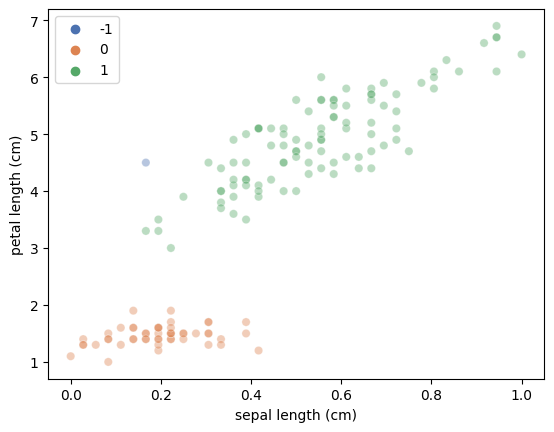

In [7]:
clustering = DBSCAN(eps=0.1, min_samples=2).fit(fs)

sns.scatterplot(x=fs["sepal length (cm)"], y=X["petal length (cm)"], alpha=0.4, hue=clustering.labels_, palette="deep")
plt.show()

Finding initial parameters can be challenging, that is why Probabilistic Quantum Clustering allows for not defining any a priori parameter.

In [ ]:
label, proba = myproject.cluster(ctype="pqc")

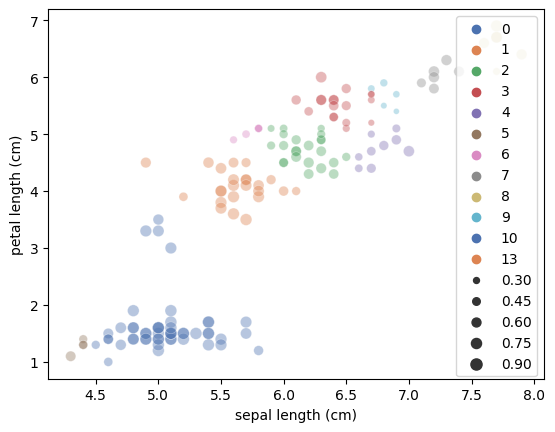

In [9]:
sns.scatterplot(x=X["sepal length (cm)"], y=X["petal length (cm)"], alpha=0.4, hue=label, size=proba, palette="deep")
plt.show()

Sometimes the selected value for sigma could be to low or high so we may want to try ourselves finding a better candidate. Moving forward, we will add techniques to better identify this hyperparameters.

```py
label, proba = myproject.cluster(ctype="pqc", sigma=0.5)
```